In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd .read_csv('cleanedgoogledata.csv')
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  day             10840 non-null  int64  
 14  month           10840 non-null  int64  
 15  year            10840 non-null  int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 1.3+ MB


In [5]:
df[df.duplicated('App')].shape

(1181, 16)

In [6]:
dfc=df.drop_duplicates(subset=['App'],keep='first')

In [7]:
dfc.shape

(9659, 16)

In [8]:
numeric_feature = [feature for feature in dfc.columns if np.issubdtype(dfc[feature].dtype,np.number)]
categorical_feature = [feature for feature in dfc.columns if not np.issubdtype(dfc[feature].dtype,np.number)]


In [9]:
print('we have {} numeric features: {}'.format(len(numeric_feature), numeric_feature))
print('we have {} categorical features: {}'.format(len(categorical_feature), categorical_feature))

we have 8 numeric features: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'day', 'month', 'year']
we have 8 categorical features: ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [10]:
for col in categorical_feature:
    print(dfc[col].value_counts(normalize=True))

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.000104
Tic Tac CK                                        0.000104
INFAMY RO                                         0.000104
CK Call NEW                                       0.000104
Ck Coif                                           0.000104
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.000104
Dance School Stories - Dance Dreams Come True     0.000104
3D Bowling                                        0.000104
Mind Games Pro                                    0.000104
iHoroscope - 2018 Daily Horoscope & Astrology     0.000104
Name: proportion, Length: 9659, dtype: float64
Category
FAMILY                 0.189668
GAME                   0.099286
TOOLS                  0.085620
BUSINESS               0.043483
MEDICAL                0.040895
PERSONALIZATION        0.038927
PRODUCTIVITY           0.038720
LIFESTYLE              0.038203
FINANCE                0.035718
SPO

C:\Users\hp\AppData\Local\Temp\ipykernel_19812\4099475578.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=dfc[numeric_feature[i]], shade=True, color='r')
c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\AppData\Local\Temp\ipykernel_19812\4099475578.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=dfc[numeric_feature[i]], shade=True, color='r')
c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf 

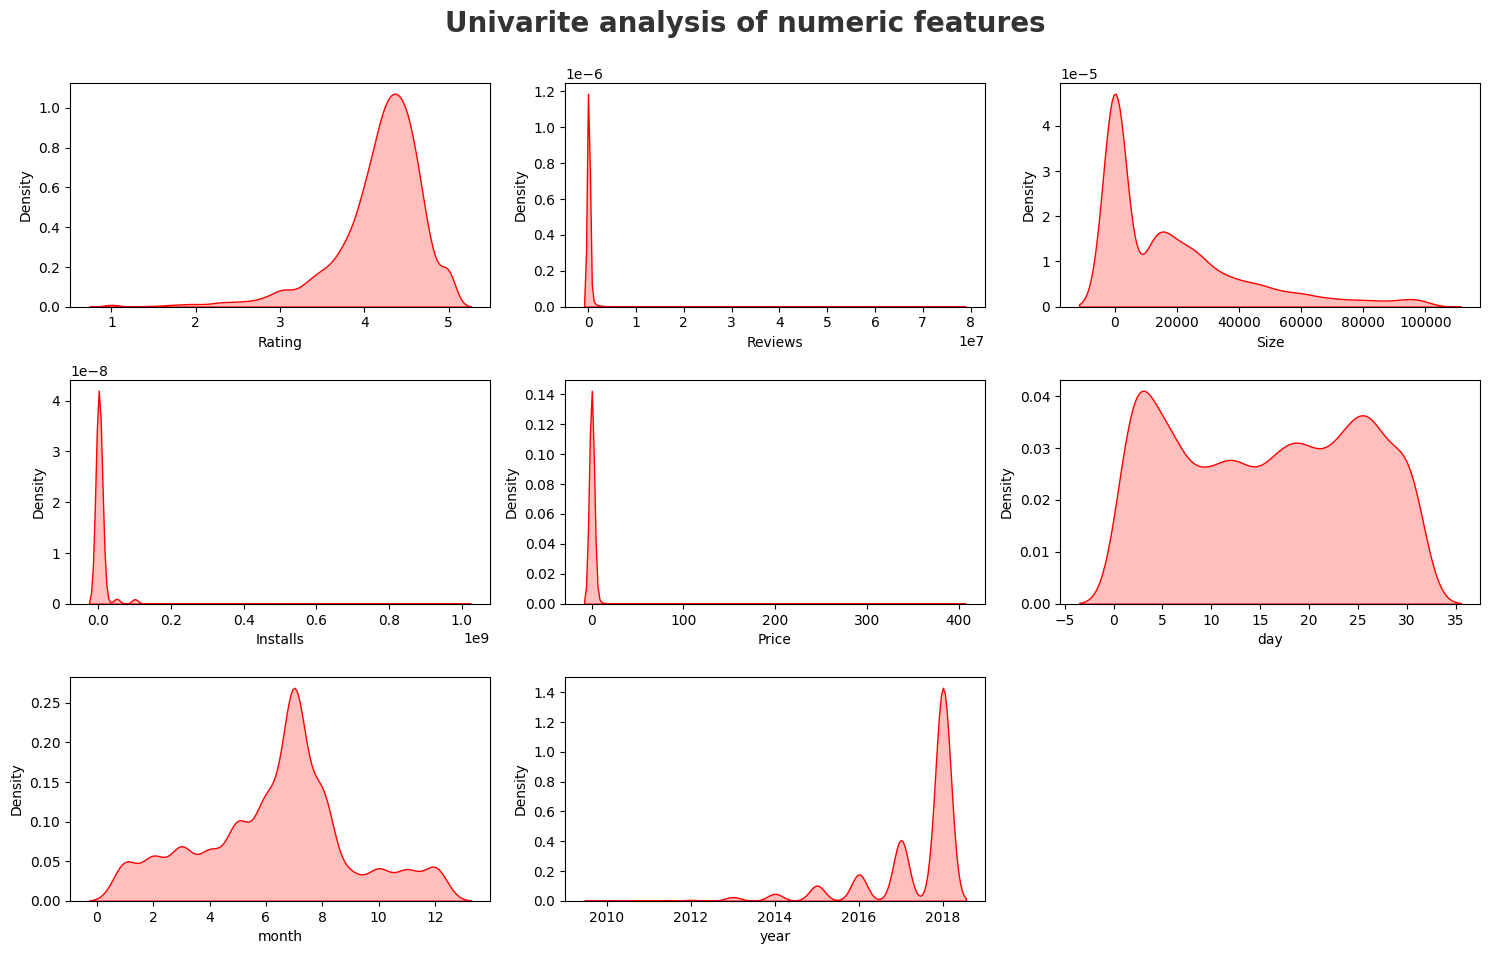

In [11]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.suptitle("Univarite analysis of numeric features", fontsize=20, fontweight='bold', alpha=0.8,y=1)
for i in range(0,len(numeric_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=dfc[numeric_feature[i]], shade=True, color='r')
    plt.xlabel(numeric_feature[i])
    plt.tight_layout()
    


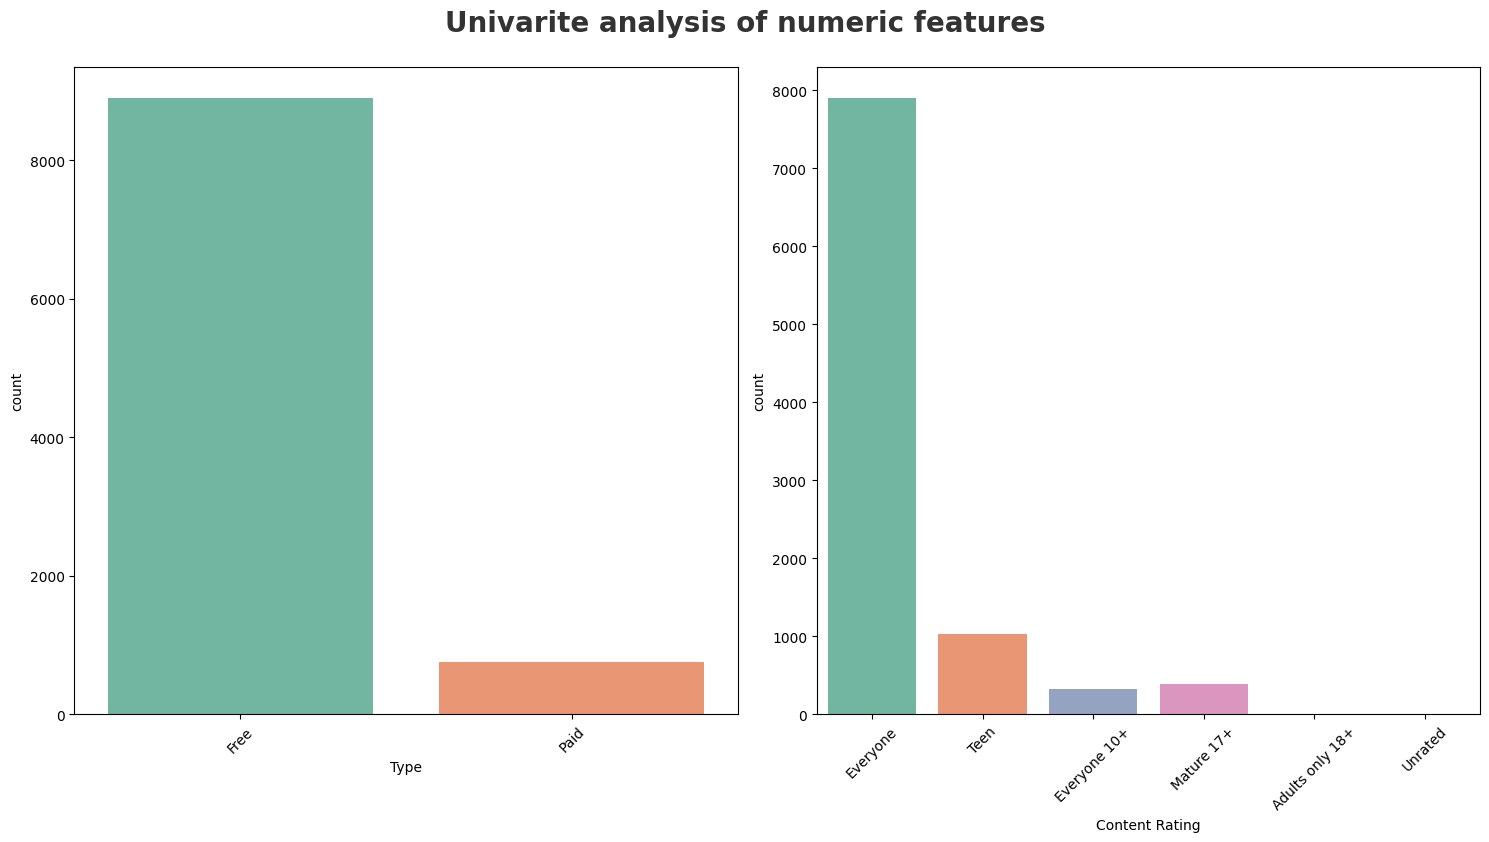

In [12]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.suptitle("Univarite analysis of numeric features", fontsize=20, fontweight='bold', alpha=0.8,y=1)
category =['Type','Content Rating']
for i in range(0,len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=dfc[category[i]],palette='Set2')
    plt.xlabel(category[i])
    plt.xticks(rotation =45)
    plt.tight_layout()
    


In [13]:
dfc.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


In [14]:
appcategory = pd.DataFrame(df['Category'].value_counts())
appcategory.rename(columns={'category':'Count'},inplace=True)

In [15]:
appcategory.head(10)

,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


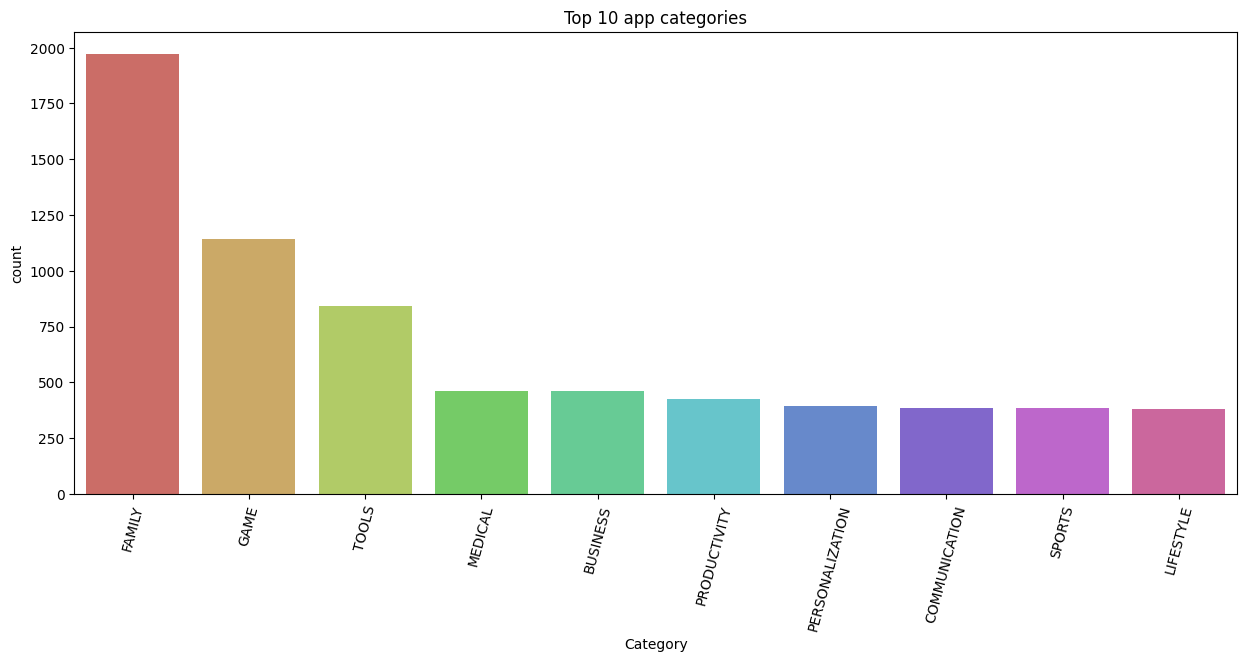

In [16]:
plt.figure(figsize=(15,6))
sns.barplot(x=appcategory.index[:10],y='count',data=appcategory[:10],palette='hls')
plt.title('Top 10 app categories')
plt.xticks(rotation=75)
plt.show()

In [17]:
dfc.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


Text(0.5, 1.0, 'Most Popular Categories in Play Store')

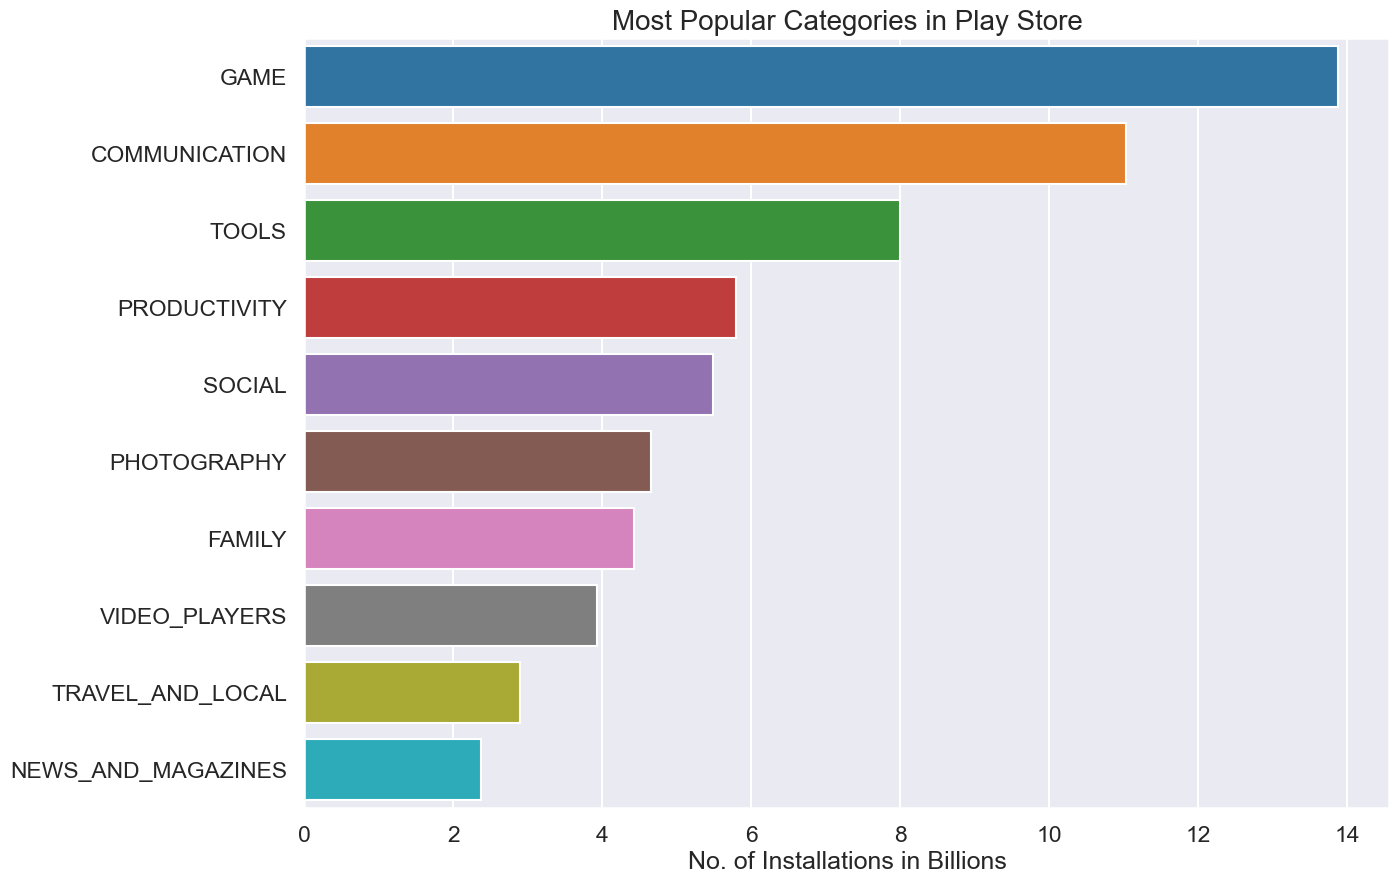

In [18]:
cat_installs = dfc.groupby('Category')['Installs'].sum().sort_values(ascending=False).reset_index()
cat_installs.Installs=cat_installs.Installs/1000000000
df2=cat_installs.head(10)
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

In [19]:
dfc.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


In [21]:
df2['Category']

0                  GAME
1         COMMUNICATION
2                 TOOLS
3          PRODUCTIVITY
4                SOCIAL
5           PHOTOGRAPHY
6                FAMILY
7         VIDEO_PLAYERS
8      TRAVEL_AND_LOCAL
9    NEWS_AND_MAGAZINES
Name: Category, dtype: object

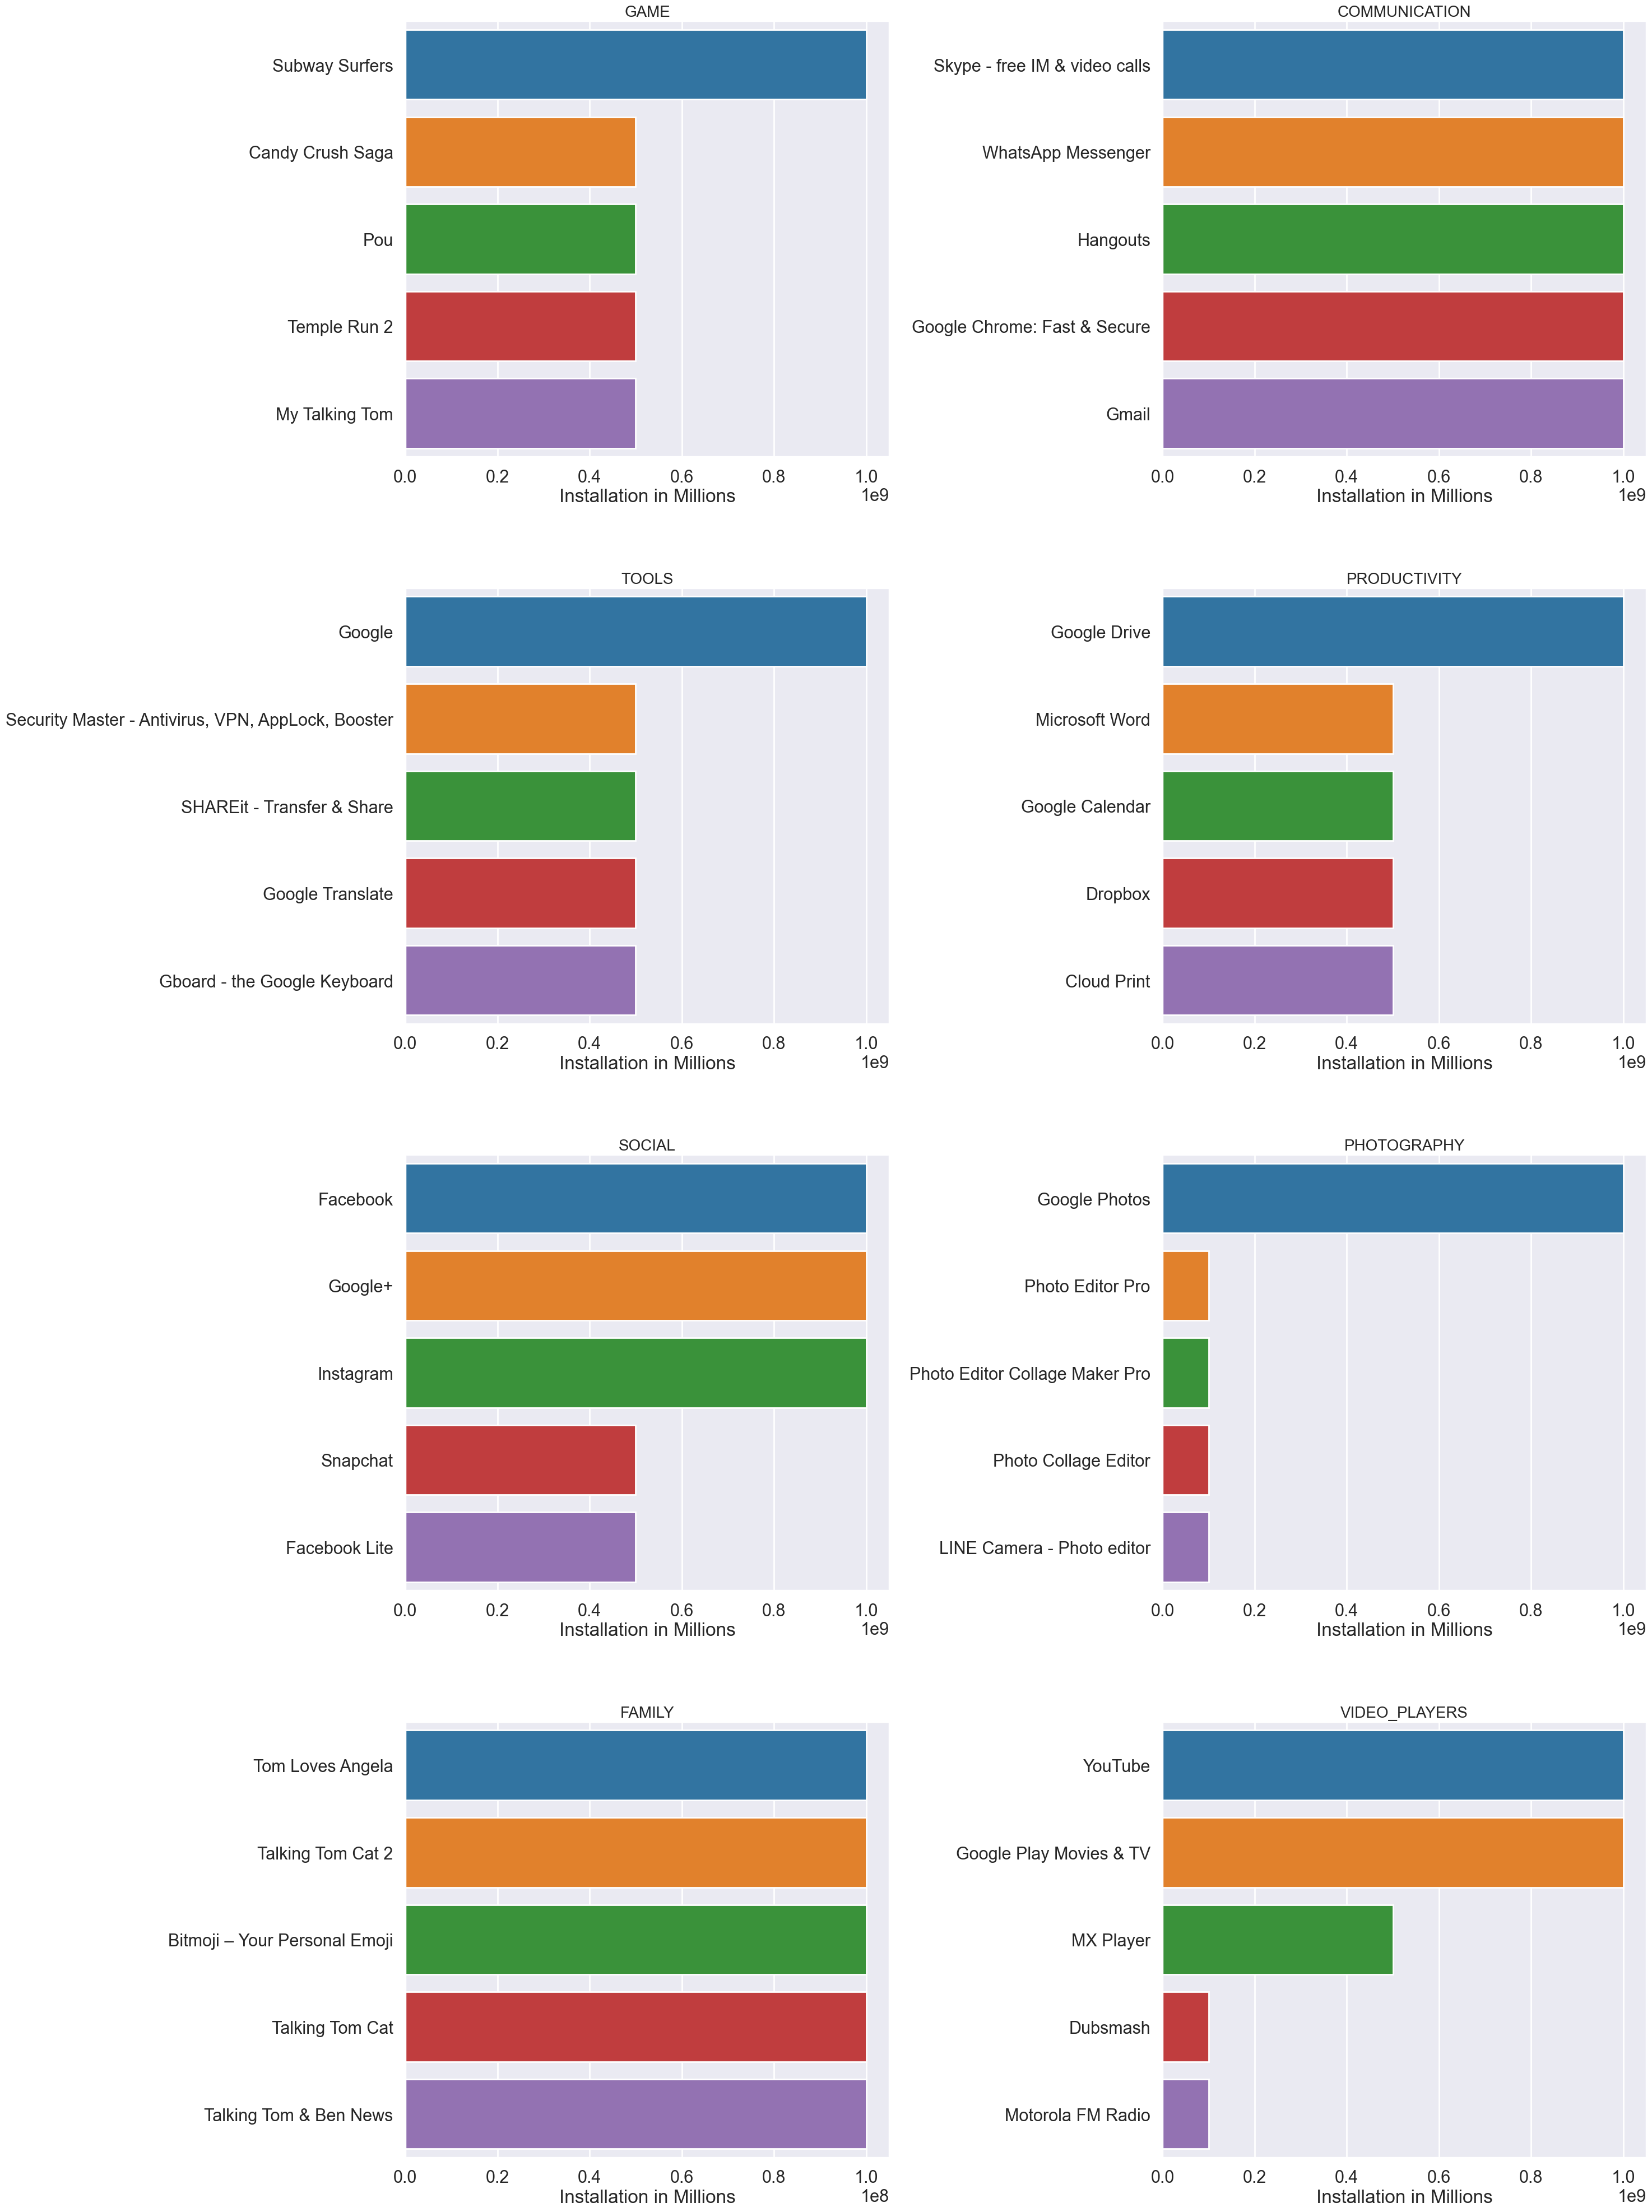

In [22]:
df3=dfc.groupby(['Category','App'])['Installs'].sum().reset_index()
df3=df3.sort_values('Installs',ascending=False)
cat_app=[       'GAME'
,     'COMMUNICATION'
,                 'TOOLS'
,          'PRODUCTIVITY'
,                'SOCIAL'
,           'PHOTOGRAPHY'
,                'FAMILY'
,         'VIDEO_PLAYERS']
sns.set_context('poster')
sns.set_style('darkgrid')
plt.figure(figsize=(30,40))

for i,app in enumerate(cat_app):
    df4=df3[df3.Category==app]
    df5=df4.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df5,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)

plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

In [24]:
rating = dfc.groupby(['Category','App','Installs'])['Rating'].sum().sort_values(ascending=False).reset_index()
topratingapps=rating[rating.Rating==5]
print("Top rated apps are ",topratingapps.shape[0])
topratingapps.head(5)

Top rated apps are  271


,Category,App,Installs,Rating
0,FAMILY,WPBS-DT,500,5.0
1,FAMILY,BV Sridhara Maharaj,100,5.0
2,GAME,211:CK,10,5.0
3,BUSINESS,Ag Valley Cooperative,500,5.0
4,LIFESTYLE,Tafsiir Quraan MP3 Af Soomaali Quraanka Kariimka,1000,5.0
